<a href="https://colab.research.google.com/github/radhika1112/Real-time-COVID-19-analysis/blob/master/COVID_19_Analysis_on_real_time_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## USING COVID-19 REAL TIME DATA FROM THE CORONA VIRUS TRACKER API 
https://coronavirus-tracker-api.herokuapp.com/all 

Date: 14 March 2020 5:16pm IST

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [0]:
api_url='https://coronavirus-tracker-api.herokuapp.com/all'

In [0]:
json_data=pd.read_json(api_url)

In [219]:
json_data.keys()

Index(['confirmed', 'deaths', 'latest', 'recovered'], dtype='object')

In [0]:
confirmed_data=json_data['confirmed']

In [221]:
deaths_data=json_data['deaths']
deaths_data

last_updated                          2020-03-15T11:57:24.552128Z
latest                                                       5819
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: deaths, dtype: object

In [222]:
latest_data=json_data['latest']
latest_data

last_updated         NaN
latest               NaN
locations            NaN
source               NaN
confirmed       156102.0
deaths            5819.0
recovered        72624.0
Name: latest, dtype: float64

In [223]:
recovered_data=json_data['recovered']
recovered_data

last_updated                          2020-03-15T11:57:29.336731Z
latest                                                      72624
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: recovered, dtype: object

In [0]:
deaths_locs=deaths_data['locations']

In [0]:
confirmed_locs=confirmed_data['locations']

In [0]:
recovered_locs=recovered_data['locations']

In [0]:
from pandas.io.json import json_normalize

confirmed_df = pd.DataFrame.from_dict(json_normalize(confirmed_locs), orient='columns')
deaths_df=pd.DataFrame.from_dict(json_normalize(deaths_locs), orient='columns')
recovered_df=pd.DataFrame.from_dict(json_normalize(recovered_locs), orient='columns')

In [0]:
recovered_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
deaths_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
confirmed_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)

In [229]:
deaths_df

,country,latest,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/14/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
0,Thailand,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Japan,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,2,4,4,5,0,0,0,0,0,0,0,6,10,15,16,19,22,6,6,6,6,6,6,6,10
2,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Saint Lucia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
438,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,Suriname,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
recovered_df.columns = recovered_df.columns.str.lstrip('history.')
deaths_df.columns = recovered_df.columns.str.lstrip('history.')
confirmed_df.columns = recovered_df.columns.str.lstrip('history.')

In [0]:


recovered_df = (recovered_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Recovered_count')
         .rename(columns={'level_2':'R_Date'}))


deaths_df = (deaths_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='death_count')
         .rename(columns={'level_2':'D_Date'}))


confirmed_df = (confirmed_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Confirmed_count')
         .rename(columns={'level_2':'C_Date'}))

In [232]:
confirmed_df

,country,latest,C_Date,Confirmed_count
0,Thailand,82,1/22/20,2
1,Thailand,82,1/23/20,3
2,Thailand,82,1/24/20,5
3,Thailand,82,1/25/20,7
4,Thailand,82,1/26/20,8
...,...,...,...,...
23421,occupied Palestinian territory,0,3/5/20,0
23422,occupied Palestinian territory,0,3/6/20,0
23423,occupied Palestinian territory,0,3/7/20,0
23424,occupied Palestinian territory,0,3/8/20,0


In [0]:
result = pd.concat([recovered_df, deaths_df,confirmed_df], axis=1, sort=True)

In [243]:
result

,country,latest,R_Date,Recovered_count,country,latest,D_Date,death_count,country,latest,C_Date,Confirmed_count
0,Thailand,35,1/22/20,0,Thailand,1,1/22/20,0,Thailand,82,1/22/20,2
1,Thailand,35,1/23/20,0,Thailand,1,1/23/20,0,Thailand,82,1/23/20,3
2,Thailand,35,1/24/20,0,Thailand,1,1/24/20,0,Thailand,82,1/24/20,5
3,Thailand,35,1/25/20,0,Thailand,1,1/25/20,0,Thailand,82,1/25/20,7
4,Thailand,35,1/26/20,2,Thailand,1,1/26/20,0,Thailand,82,1/26/20,8
...,...,...,...,...,...,...,...,...,...,...,...,...
23421,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0
23422,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0
23423,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0
23424,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0


In [0]:
result=result[['country','R_Date','Recovered_count','death_count','Confirmed_count']]

In [245]:
result=result.iloc[:,2:]
result

,country,R_Date,Recovered_count,death_count,Confirmed_count
0,Thailand,1/22/20,0,0,2
1,Thailand,1/23/20,0,0,3
2,Thailand,1/24/20,0,0,5
3,Thailand,1/25/20,0,0,7
4,Thailand,1/26/20,2,0,8
...,...,...,...,...,...
23421,occupied Palestinian territory,3/5/20,0,0,0
23422,occupied Palestinian territory,3/6/20,0,0,0
23423,occupied Palestinian territory,3/7/20,0,0,0
23424,occupied Palestinian territory,3/8/20,0,0,0


In [246]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23426 entries, 0 to 23425
Data columns (total 5 columns):
country            23426 non-null object
R_Date             23426 non-null object
Recovered_count    23426 non-null int64
death_count        23426 non-null int64
Confirmed_count    23426 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [0]:
from datetime import datetime
result['Date']= pd.to_datetime(result['R_Date'])
result = result.sort_values(by="Date")
# my_date = datetime.strptime(my_string, "%Y-%m-%d")
result['Date'] =result['Date'].apply(lambda x: datetime.strftime(x, "%d-%m"))

In [239]:
result.head()

,country,R_Date,Recovered_count,death_count,Confirmed_count,Date
0,Thailand,1/22/20,0,0,2,22-01
1,Thailand,1/23/20,0,0,3,23-01
2,Thailand,1/24/20,0,0,5,24-01
3,Thailand,1/25/20,0,0,7,25-01
4,Thailand,1/26/20,2,0,8,26-01


In [158]:
result.country.unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [0]:
count_in_India = result[result['country']=='India']


In [268]:
count_in_India.tail(30)

,country,R_Date,Recovered_count,death_count,Confirmed_count,Date
810,India,2/14/20,0,0,3,14-02
811,India,2/15/20,0,0,3,15-02
812,India,2/16/20,3,0,3,16-02
813,India,2/17/20,3,0,3,17-02
814,India,2/18/20,3,0,3,18-02
815,India,2/19/20,3,0,3,19-02
817,India,2/20/20,3,0,3,20-02
818,India,2/21/20,3,0,3,21-02
819,India,2/22/20,3,0,3,22-02
820,India,2/23/20,3,0,3,23-02


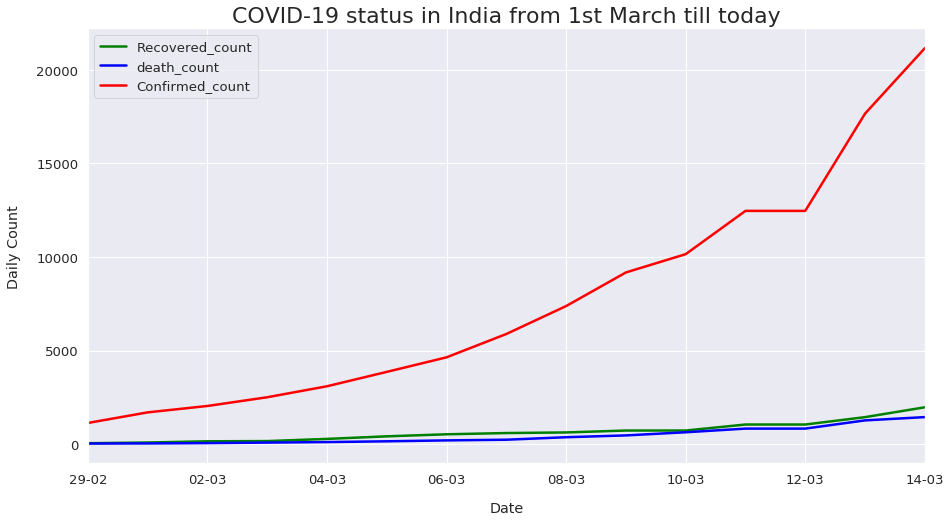

In [265]:
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
count_in_India.iloc[-15:,:].set_index('Date')['Recovered_count'].plot(figsize=(15, 8), linewidth=2.5, color='green')
count_in_India.iloc[-15:,:].set_index('Date')['death_count'].plot(figsize=(15, 8), linewidth=2.5, color='blue')
count_in_India.iloc[-15:,:].set_index('Date')['Confirmed_count'].plot(figsize=(15, 8), linewidth=2.5, color='red')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Count", labelpad=15)
plt.legend()
plt.title("COVID-19 status in India from 1st March till today", y=1.0, fontsize=22);

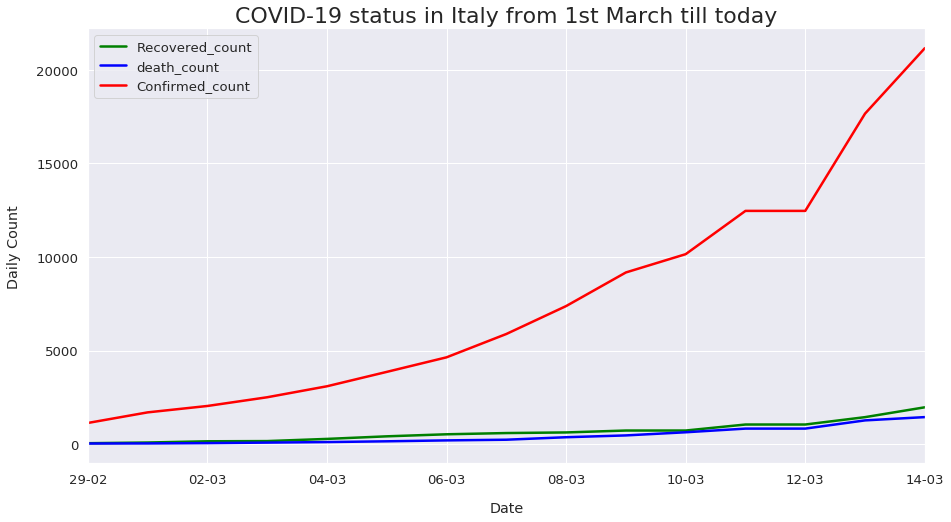

In [266]:
count_in_Italy = result[result['country']=='Italy']

sns.set(font_scale=1.2)
count_in_Italy.iloc[-15:,:].set_index('Date')['Recovered_count'].plot(figsize=(15, 8), linewidth=2.5, color='green')
count_in_Italy.iloc[-15:,:].set_index('Date')['death_count'].plot(figsize=(15, 8), linewidth=2.5, color='blue')
count_in_Italy.iloc[-15:,:].set_index('Date')['Confirmed_count'].plot(figsize=(15, 8), linewidth=2.5, color='red')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Count", labelpad=15)
plt.legend()
plt.title("COVID-19 status in Italy from 1st March till today", y=1.0, fontsize=22);